In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics

from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
df = pd.read_excel('/content/drive/My Drive/clean_combined_toronto_property_data.xlsx')
df.head(2)

,region,Address,Price,bedrooms,bathrooms,sqft_living,sqft_lot,pricem
0,"Ajax, ON","2 ROLLO DR, Ajax, Ontario",799000.0,3.0,3.0,1180,5650,0.799
1,"Ajax, ON","717 OLD HARWOOD AVE, Ajax, Ontario",989000.0,2.0,1.0,2570,7242,0.989


In [4]:
df = df[df.bedrooms > 0]
df = df[df.bathrooms > 0]

In [5]:
df["region"] = df["region"].str.replace("ON", "")
df["region"] = df["region"].str.replace(",", "")
df.head()

,region,Address,Price,bedrooms,bathrooms,sqft_living,sqft_lot,pricem
0,Ajax,"2 ROLLO DR, Ajax, Ontario",799000.0,3.0,3.0,1180,5650,0.799000
1,Ajax,"717 OLD HARWOOD AVE, Ajax, Ontario",989000.0,2.0,1.0,2570,7242,0.989000
2,Ajax,"52 ADDLEY CRES, Ajax, Ontario",999900.0,3.0,4.0,770,10000,0.999900
3,Ajax,"249 MONARCH AVE, Ajax, Ontario",799900.0,3.0,3.0,1960,5000,0.799900
4,Ajax,"18 MONK CRES, Ajax, Ontario",899999.0,3.0,3.0,1680,8080,0.899999


 ## Machine Learning Lagorithm

In [6]:
y = df.Price
X = pd.get_dummies(df.drop(columns= ["Price", "pricem"]), prefix= 'region')
print(X.shape)
X.head()

(7253, 7251)


,bedrooms,bathrooms,sqft_living,sqft_lot,region_Ajax,region_Aurora,region_Brampton,region_Brantford,region_Brock,region_Burlington,...,"region_LOT29 BL WHITBY MEADOWS, Whitby, Ontario","region_LOT438R HAGER CREEK TERR, Hamilton, Ontario","region_LOT440L HAGER CREEK TERR, Hamilton, Ontario","region_LOT6-32 MAPLE GROVE AVE, Richmond Hill, Ontario","region_LOT77-4 PINEWOOD (T2), Whitchurch-Stouffville, Ontario","region_LT 14 FALL HARVEST CRT, Kitchener, Ontario","region_LT 14 FALL HARVEST Court, Kitchener, Ontario","region_U 2 2315 BROMSGROVE RD, Mississauga, Ontario","region_U 3 78 LOWTHER AVE, Toronto, Ontario","region_U 5 BLK 4 PUISAYA ST, Richmond Hill, Ontario"
0,3.0,3.0,1180,5650,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,2570,7242,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,4.0,770,10000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,1960,5000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,3.0,1680,8080,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size= 0.80, random_state= 1)

## Regression Algorithms

In [9]:
def classification_result(y_test, y_pred):
    print('Test Accuracy:', accuracy_score(y_test, y_pred) * 100)
    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))
    clf_report = classification_report(y_test, y_pred, target_names=['Low_Price','High_Price'], output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.show()

In [8]:
RSME, R_sqr = [],[]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)

695491.5765589527
[ 1.20012193e+05  1.47276460e+05 -1.44434452e+01 ... -3.36336584e+05
  2.60800212e+06  0.00000000e+00]


In [ ]:
#predicting the test set result
lr_predict = lr.predict(X_test)

Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100,criterion='squared_error',n_jobs=2)
rf.fit(X_train,y_train)

rf_predict = rf.predict(X_test)

In [ ]:
import sklearn.metrics as metrics

print('MAE:', metrics.mean_absolute_error(y_test, rf_predict))  
print('MSE:', metrics.mean_squared_error(y_test, rf_predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))
print("Score (R^2):",rf.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))
R_sqr.append(rf.score(X_test,y_test))

MAE: 401319.5945968298
MSE: 887768009566.6029
RMSE: 942214.4180422007
Score (R^2): 0.4758423962366891


In [ ]:
score_rf = rf.score(X_test,y_test)
RMSE_rf = np.sqrt(metrics.mean_squared_error(y_test, rf_predict))

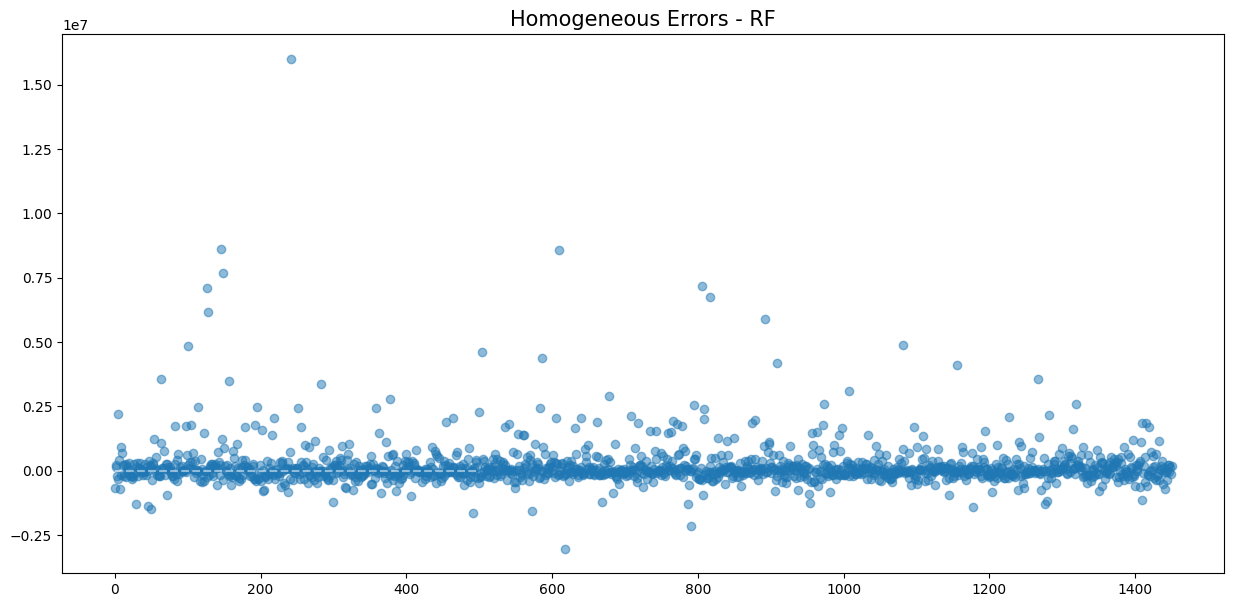

In [ ]:
# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': rf_predict,
                            'Error': y_test - rf_predict})

plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
yerr= performance['Error']

plt.scatter(range(len(yerr)), yerr, alpha=.5)
plt.title('Homogeneous Errors - RF', size=15);
plt.hlines(y=0, xmin=0, xmax=500, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

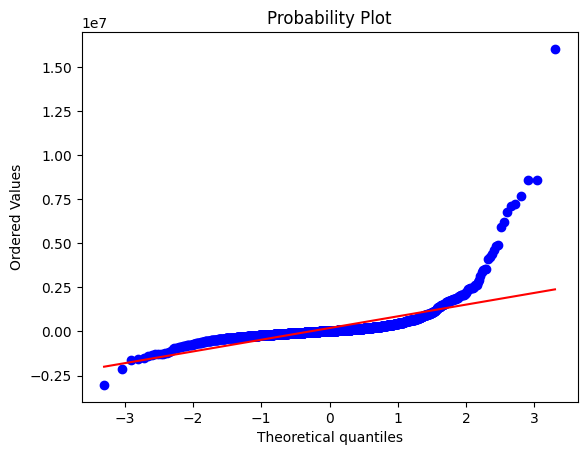

In [ ]:
from scipy.stats import probplot
#QQ Plot
probplot(yerr, dist='norm', plot=plt);

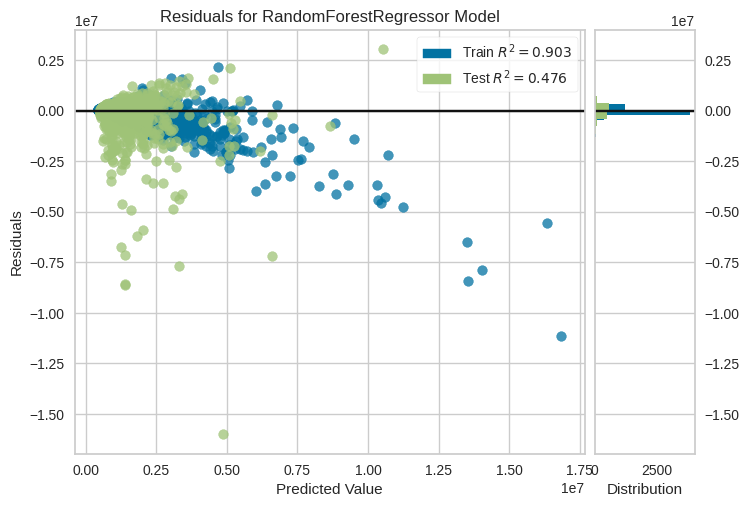

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

 XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor, plot_importance

xgb = XGBRegressor(n_estimators=100, learning_rate=0.08)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb_predict = xgb.predict(X_test)
score_xgb = xgb.score(X_test,y_test)
RMSE_xgb = np.sqrt(metrics.mean_squared_error(y_test, xgb_predict))

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, xgb_predict))  
print('MSE:', metrics.mean_squared_error(y_test, xgb_predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_predict)))
print("Score (R^2):",xgb.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, xgb_predict)))
R_sqr.append(xgb.score(X_test,y_test))

MAE: 431922.34467608546
MSE: 855591226602.1299
RMSE: 924981.7439291058
Score (R^2): 0.4948402709896934


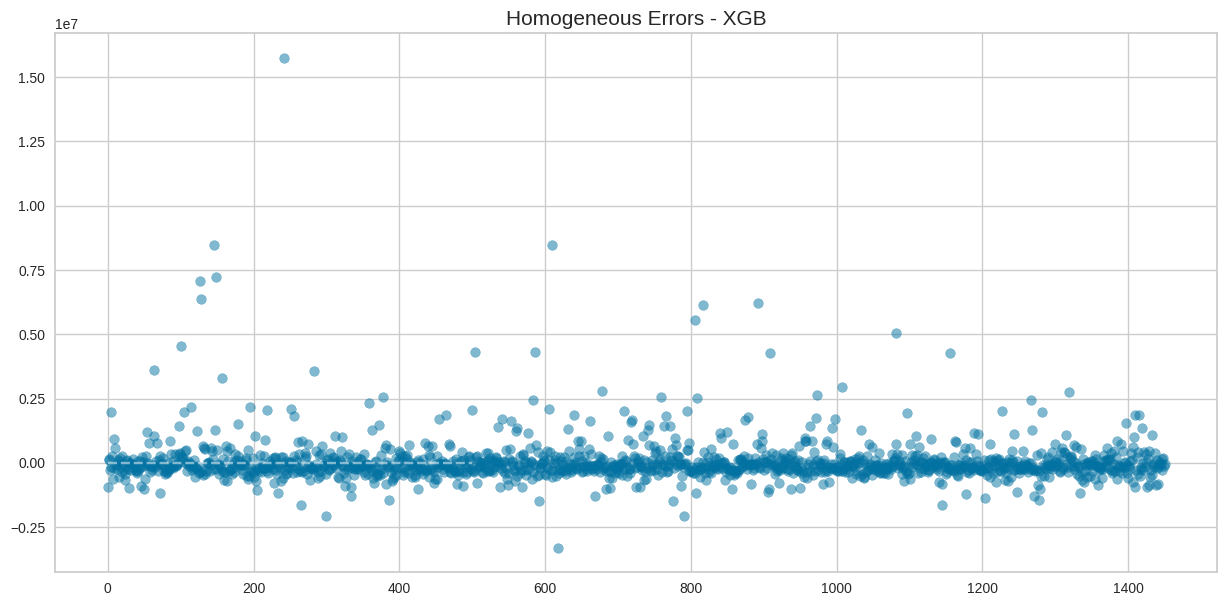

In [ ]:
# Performance
xgbperf = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': xgb_predict,
                            'Error': y_test - xgb_predict})

plt.figure(figsize=(15,7))
# Errors
ax_x= xgbperf['True Value']
ax_y= xgbperf['Prediction']
y_xgb= xgbperf['Error']

plt.scatter(range(len(y_xgb)),y_xgb, alpha=.5)
plt.title('Homogeneous Errors - XGB', size=15);
plt.hlines(y=0, xmin=0, xmax=500, linestyle='--', color='white', alpha=.5);

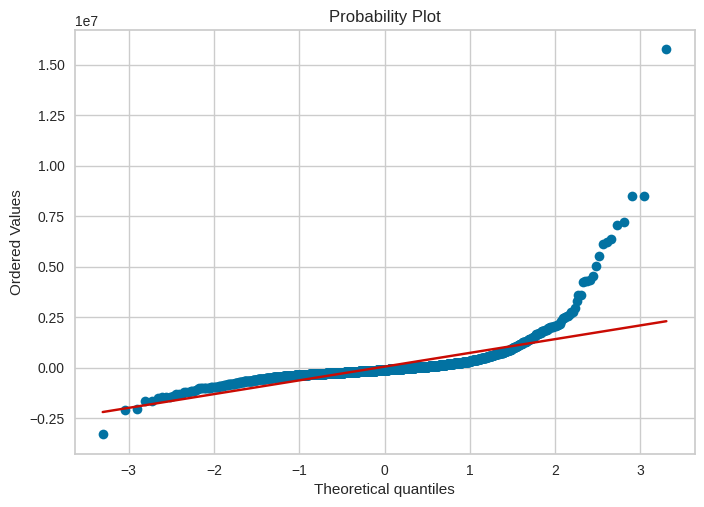

In [ ]:
from scipy.stats import probplot
#QQ Plot
probplot(y_xgb, dist='norm', plot=plt);

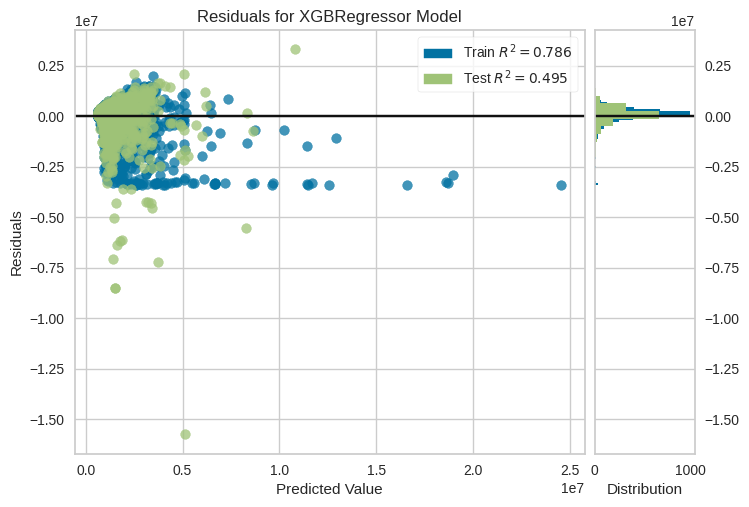

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(xgb)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

Support Vector Regressor

In [11]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

svr_predict = svr.predict(X_test)

In [12]:
score_svr = svr.score(X_test,y_test)
RMSE_svr = np.sqrt(metrics.mean_squared_error(y_test, svr_predict))

In [13]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_predict))  
print('MSE:', metrics.mean_squared_error(y_test, svr_predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_predict)))
print("Score (R^2):",svr.score(X_test,y_test))
RSME.append(np.sqrt(metrics.mean_squared_error(y_test, svr_predict)))
R_sqr.append(svr.score(X_test,y_test))

MAE: 668311.6832329379
MSE: 1845971909695.9407
RMSE: 1358665.4885202392
Score (R^2): -0.08990209421149076


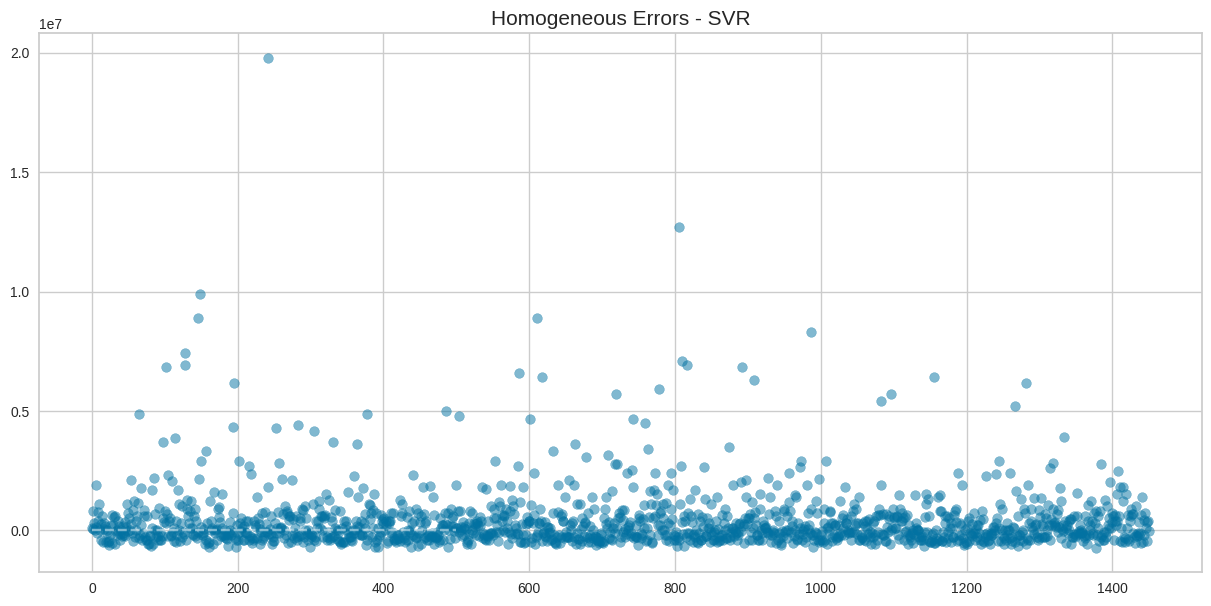

In [14]:
# Performance
svrperf = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': svr_predict,
                            'Error': y_test - svr_predict})

plt.figure(figsize=(15,7))
# Errors
ax_x= svrperf['True Value']
ax_y= svrperf['Prediction']
svr_err= svrperf['Error']

plt.scatter(range(len(svr_err)), svr_err, alpha=.5)
plt.title('Homogeneous Errors - SVR', size=15);
plt.hlines(y=0, xmin=0, xmax=500, linestyle='--', color='white', alpha=.5);

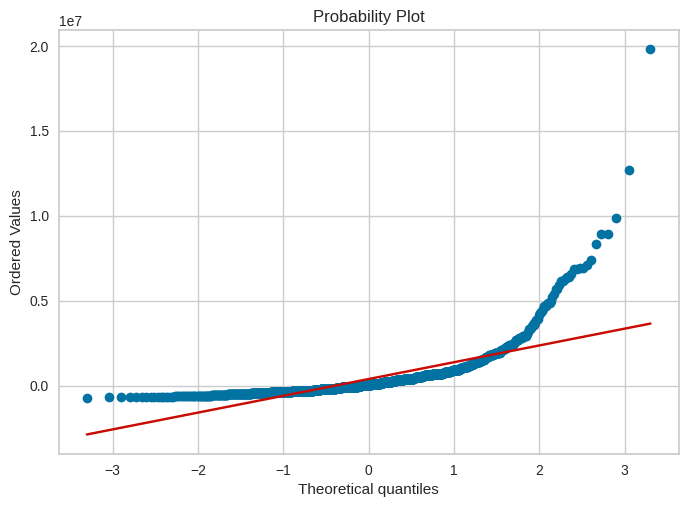

In [15]:
from scipy.stats import probplot
#QQ Plot
probplot(svr_err, dist='norm', plot=plt);

KeyboardInterrupt: ignored

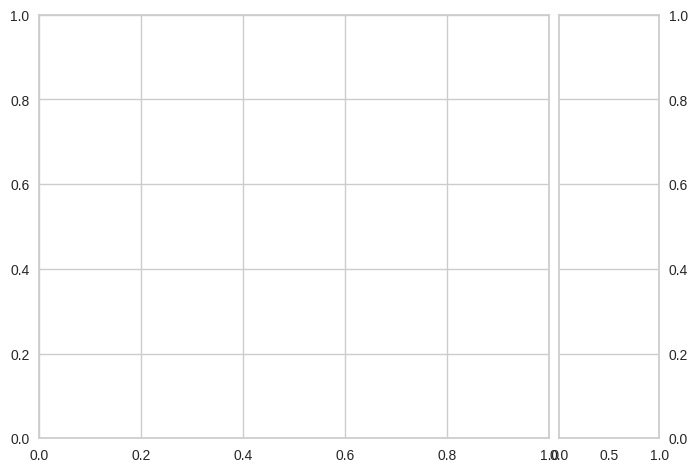

In [16]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(svr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

KNN

In [17]:
# Fitting KNN model to the dataset
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(metric='minkowski', n_neighbors=5, n_jobs=-1)
knr.fit(X_train, y_train)

# Predicting the yield
knr_predict = knr.predict(X_test)

In [19]:
score_knr = knr.score(X_test,y_test)
RMSE_knr = np.sqrt(metrics.mean_squared_error(y_test, knr_predict))

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, knr_predict))  
print('MSE:', metrics.mean_squared_error(y_test, knr_predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knr_predict)))
print("Score (R^2):",knr.score(X_test,y_test))
RSME.append(np.sqrt(metrics.mean_squared_error(y_test, knr_predict)))
R_sqr.append(knr.score(X_test,y_test))

MAE: 788305.838456237
MSE: 1951197775457.5513
RMSE: 1396852.8109495114
Score (R^2): -0.15202974136387182


In [21]:
# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': knr_predict,
                            'Error': y_test - knr_predict})
# View
performance

,True Value,Prediction,Error
2413,1199000.0,1349558.0,-150558.0
3804,1149000.0,1086720.0,62280.0
4455,1899000.0,1149560.0,749440.0
3688,1388000.0,1100200.0,287800.0
4544,1100000.0,1017179.8,82820.2
...,...,...,...
3273,1199900.0,951780.0,248120.0
7052,649000.0,1999399.6,-1350399.6
4799,1449000.0,1358760.0,90240.0
963,1499900.0,1469160.0,30740.0


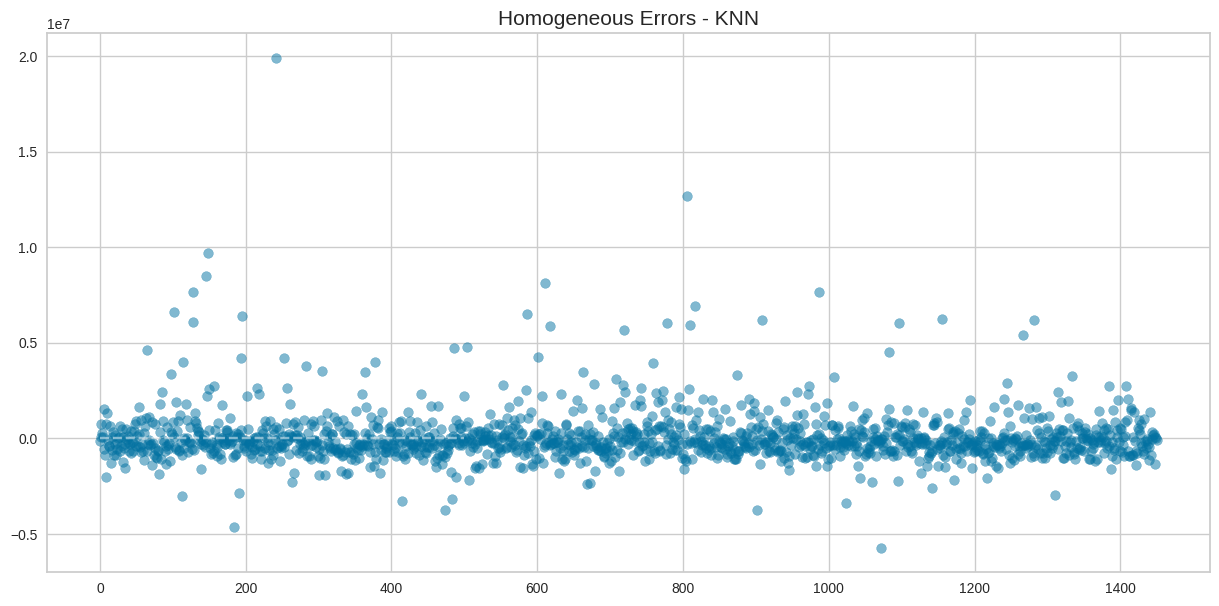

In [23]:
plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
knr_err= performance['Error']

plt.scatter(range(len(knr_err)), knr_err, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=15);
plt.hlines(y=0, xmin=0, xmax=500, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

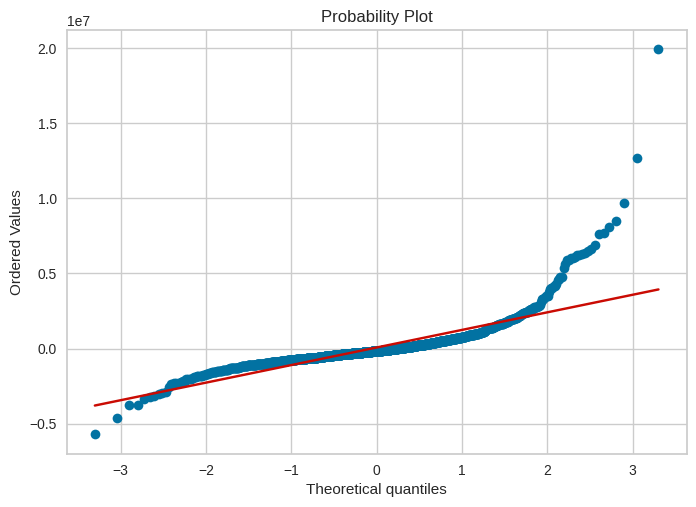

In [25]:
from scipy.stats import probplot
#QQ Plot
probplot(knr_err, dist='norm', plot=plt);

The model presents some outliers, but most of the predictions are good. It should be enhanced with a little more clenup in the data, though.

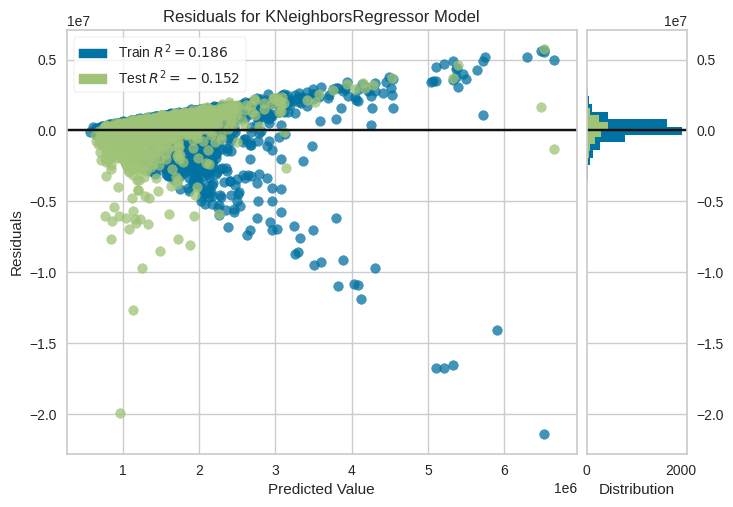

<Axes: title={'center': 'Residuals for KNeighborsRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [26]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(knr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
data = {'RSME': [8.2798, 9.4503 ,7.2498 , 13.5865, 10.1430, 11.8293],
        'R_Sqr': [1.0,0.472, 1.494, 0.089, 0.392,0.307]}


Models=['Linear Regression','Random Forest','XG Boost','SVR','KNN', 'Lasso regression']
# Creates pandas DataFrame.
df = pd.DataFrame(data, index= Models)
df

,RSME,R_Sqr
Linear Regression,8.2798,1.000
Random Forest,9.4503,0.472
XG Boost,7.2498,1.494
SVR,13.5865,0.089
KNN,10.1430,0.392
Lasso regression,11.8293,0.307


<Axes: >

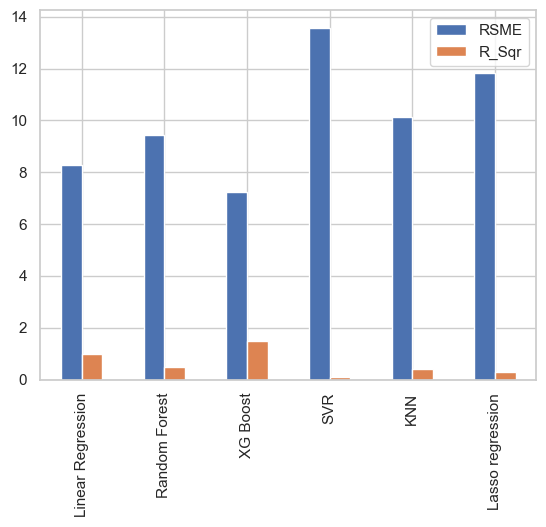

In [ ]:
df.plot(kind='bar')

## Second Dataset

In [27]:
df2 = pd.read_csv('/content/drive/My Drive/properties.csv')
df2.rename(columns={'Price ($)': 'Price'}, inplace=True)
df2.head(2)

,Address,AreaName,Price,bedrooms,bathrooms,sqft_living,sqft_lot,lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888.0,3,1.00,1180,5650,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900.0,3,2.25,2570,7242,43.250000,-79.904396


In [28]:
df2 = df2[(df2['lat'] != -999 ) & (df2['lng'] != -999)]

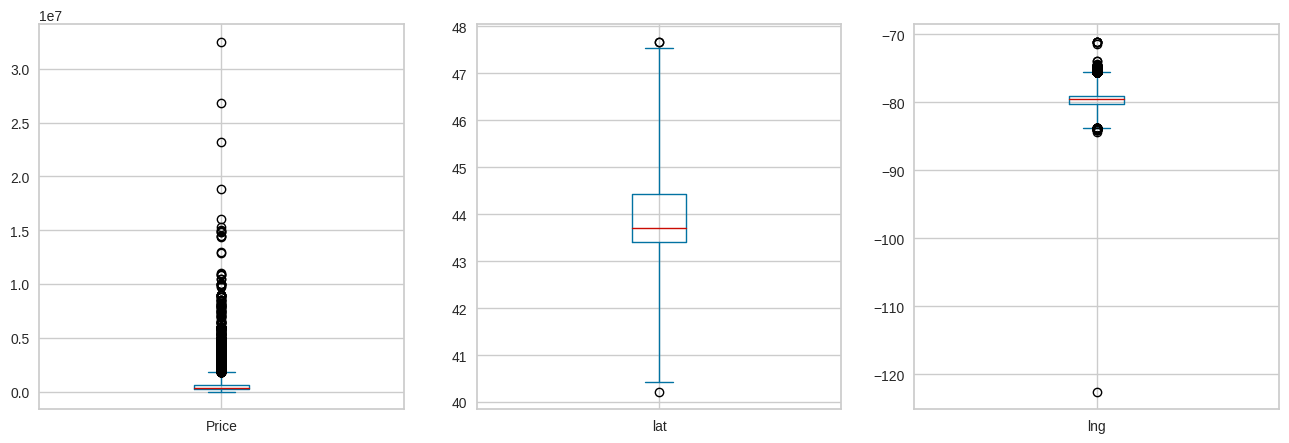

Index(['Address', 'AreaName', 'Price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'lat', 'lng'],
      dtype='object') (25032, 9)


In [31]:
def remove_outliers(df2, *cols):
    for col in cols:
        q1 = df2[col].quantile(q = 0.25)
        q3 = df2[col].quantile(q = 0.75) 
        iqr = q3 - q1
        t1 = q1 - 3 * iqr
        t2 = q3 + 3 * iqr
        data = df2[(df2[col] > t1) & (df2[col] < t2)]
    return data

data_c = remove_outliers(df2, 'Price','lng', 'lat')
data_c.shape
fig,axes = plt.subplots(1,3,figsize=(16,5))
data_c['Price'].plot.box(whis=3, grid=True, ax = axes[0])
data_c['lat'].plot.box(whis=3, grid=True, ax = axes[1])
data_c['lng'].plot.box(whis=3, grid=True, ax = axes[2])
plt.show()
print(data_c.columns,data_c.shape)

In [30]:
# Seperate data with/without null:
data_withna = data_c.loc[data_c['AreaName'].isna()]
data_wona = data_c.loc[data_c['AreaName'].notna()]
print(data_withna.shape, data_wona.shape)

(316, 9) (24716, 9)


In [32]:
# Split train/test dataset:
from sklearn.model_selection import train_test_split
training, testing = train_test_split(data_wona,test_size=0.25, random_state=1)

x_train = training.copy()[['lat','lng']]
y_train = training.copy()['AreaName']

x_test = testing.copy()[['lat','lng']]
y_test = testing.copy()['AreaName']

print(training.shape)
print(testing.shape)

(18537, 9)
(6179, 9)


In [33]:
# Build Random Forest Classifier workflow:
from sklearn.preprocessing import PowerTransformer, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 
rf_model = RandomForestClassifier(criterion='gini',
                                  n_jobs=16,
                                  max_features = 'auto',
                                  n_estimators = 100,
                                  max_depth = None,
                                  random_state=133)
pipe_clf = Pipeline([
        ('sc',StandardScaler()),
        ('power_trans',PowerTransformer()),
        ('polynom_trans',PolynomialFeatures(degree=2)),
        ('rf_clf', rf_model)
        ])
print(pipe_clf)

Pipeline(steps=[('sc', StandardScaler()), ('power_trans', PowerTransformer()),
                ('polynom_trans', PolynomialFeatures()),
                ('rf_clf',
                 RandomForestClassifier(max_features='auto', n_jobs=16,
                                        random_state=133))])


In [34]:
# Fit model & Check the accuracy score of the random forest model:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
pipe_clf.fit(x_train,y_train)
y_predict = pipe_clf.predict(x_test)
print(f'accuracy score is: {accuracy_score(y_test,y_predict)}')

accuracy score is: 0.9160058261854669


In [35]:
data_withna['AreaName'] = pipe_clf.predict(data_withna[['lat','lng']])
data_withna.head()

,Address,AreaName,Price,bedrooms,bathrooms,sqft_living,sqft_lot,lat,lng
209,"7393 Wellington Rd 51 . Ariss, ON",Guelph,699000.0,6,3.00,2300,3404,43.596718,-80.340660
1186,"152 MARR Drive Elora, ON",Elora,399900.0,3,1.00,1170,11100,43.693314,-80.437492
1272,"4 MOSS DRIVE Long Sault, ON",Saint Andrews West,385000.0,4,3.25,4250,8570,45.038666,-74.861732
1273,"13 STRATFORD BOULEVARD Long Sault, ON",Saint Andrews West,399000.0,3,2.50,2400,99752,45.031109,-74.875374
1276,"44 FOREST HILL ROAD Long Sault, ON",Saint Andrews West,790000.0,4,2.25,2350,18600,45.032341,-74.874435


In [36]:
# Combine two forms & export
data_f = pd.concat([data_wona, data_withna])
data_f.head()

,Address,AreaName,Price,bedrooms,bathrooms,sqft_living,sqft_lot,lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888.0,3,1.00,1180,5650,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900.0,3,2.25,2570,7242,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000.0,2,1.00,770,10000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900.0,4,3.00,1960,5000,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000.0,3,2.00,1680,8080,43.651478,-79.368118


In [42]:
y = data_f['Price']
X = pd.get_dummies(data_f.drop(columns= ["Price","lat","lng","Address"]), prefix= 'AreaName')
print(X.shape)
X.head()

(25032, 1091)


,bedrooms,bathrooms,sqft_living,sqft_lot,AreaName_Aberfoyle,AreaName_Acton,AreaName_Agassiz,AreaName_Agincourt,AreaName_Agincourt North,AreaName_Ahmic Harbour,...,AreaName_Yarker,AreaName_Yeoville,AreaName_Yonge and Lawrence,AreaName_York,AreaName_York District,AreaName_York Mills,AreaName_York University Heights,AreaName_Yorkdale,AreaName_Zephyr,AreaName_Zurich
0,3,1.00,1180,5650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570,7242,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22528, 1091), (22528,), (2504, 1091), (2504,))

In [ ]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X_train,y_train)
print(lr2.intercept_)
print(lr2.coef_)

599580.7518597563
[-1.44003823e+04  2.06393640e+03  9.34571783e+00 ... -4.57886897e+05
  5.70051065e+05 -3.40528852e+05]


In [ ]:
lr_pred2 = lr2.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred2))  
print('MSE:', metrics.mean_squared_error(y_test, lr_pred2))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred2)))
print("Score (R^2):",lr2.score(X_test,y_test))
RSME.append(np.sqrt(metrics.mean_squared_error(y_test, lr_pred2)))
R_sqr.append(lr2.score(X_test,y_test))

MAE: 358357.30505722464
MSE: 685556064288.5383
RMSE: 827983.1304371716
Score (R^2): 0.24659684397560633


Random Forest: 

In [44]:
rf2 = RandomForestRegressor(n_estimators=100,criterion='squared_error',n_jobs=2)
rf2.fit(X_train,y_train)

RandomForestRegressor(n_jobs=2)

In [45]:
rf_pred2 = rf2.predict(X_test)

In [46]:
import sklearn.metrics as metrics
RSME, R_sqr = [],[] 
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred2))  
print('MSE:', metrics.mean_squared_error(y_test, rf_pred2))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred2)))
print("Score (R^2):",rf2.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, rf_pred2)))
R_sqr.append(rf2.score(X_test,y_test))

MAE: 409755.6572345272
MSE: 856540760495.5302
RMSE: 925494.8732951091
Score (R^2): 0.05869038896100731


In [47]:
# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': rf_pred2,
                            'Error': y_test - rf_pred2})
# View
performance

,True Value,Prediction,Error
13660,298000.0,482945.630000,-184945.630000
507,379900.0,486989.340000,-107089.340000
18194,88800.0,242846.000000,-154046.000000
3044,349900.0,269353.220000,80546.780000
14928,99900.0,128886.390000,-28986.390000
...,...,...,...
17240,499900.0,597112.000000,-97212.000000
10446,139900.0,314337.800000,-174437.800000
16621,649900.0,665335.680000,-15435.680000
7632,199900.0,364085.900000,-164185.900000


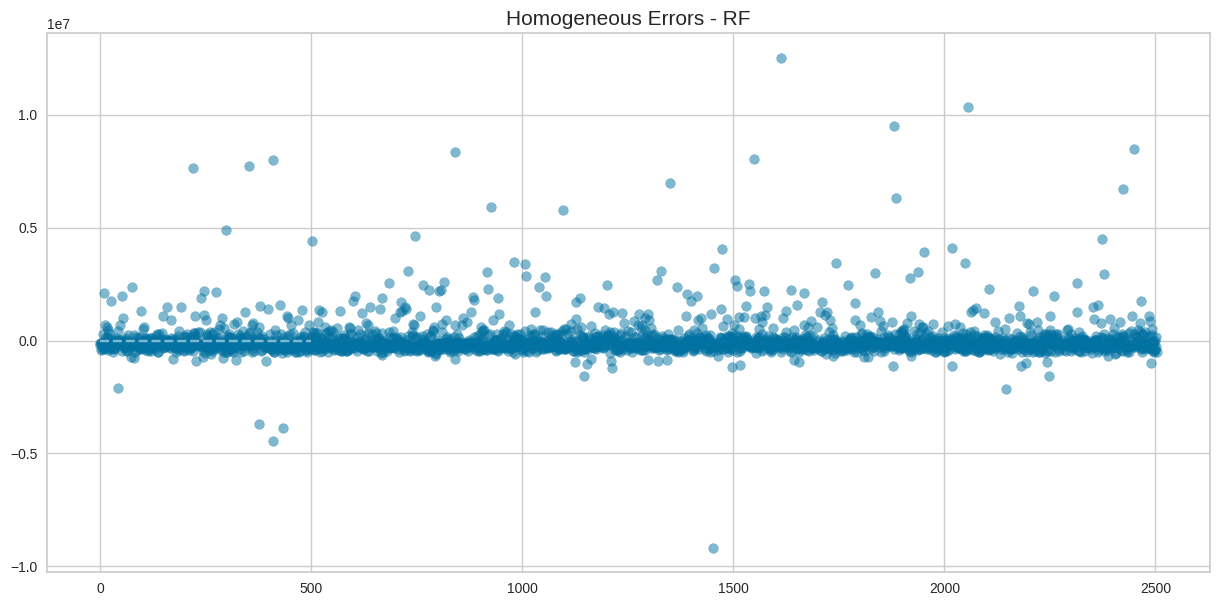

In [61]:
plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
rf2_err= performance['Error']

plt.scatter(range(len(rf2_err)), rf2_err, alpha=.5)
plt.title('Homogeneous Errors - RF', size=15);
plt.hlines(y=0, xmin=0, xmax=500, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

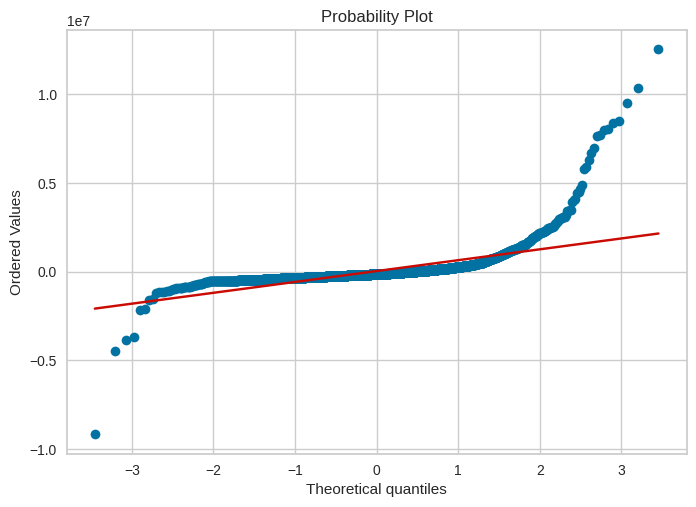

In [70]:
from scipy.stats import probplot
#QQ Plot
probplot(rf2_err, dist='norm', plot=plt);

ValueError: ignored

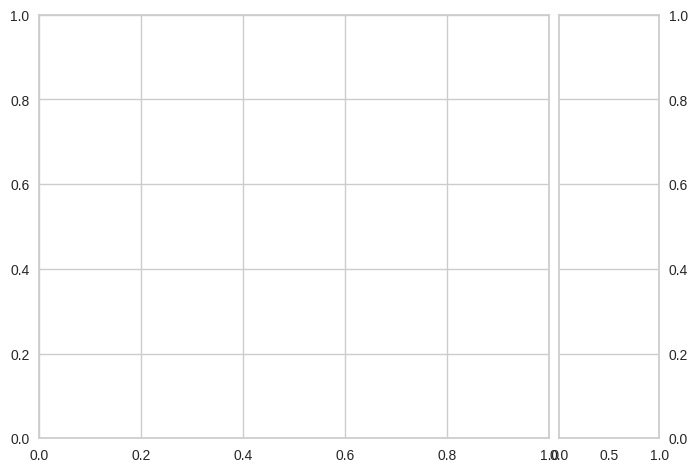

In [50]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(knr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

XG Boost Regressor:

In [51]:
from xgboost import XGBRegressor, plot_importance

xgb2 = XGBRegressor(n_estimators=100, learning_rate=0.08)

In [53]:
xgb2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [54]:
xgb_pred2 = xgb2.predict(X_test)
xgb2.score(X_test,y_test)

0.15945121244635851

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, xgb_pred2))  
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred2))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred2)))
print("Score (R^2):",xgb2.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred2)))
R_sqr.append(xgb2.score(X_test,y_test))

MAE: 396264.6570986422
MSE: 764853868781.9349
RMSE: 874559.2425799038
Score (R^2): 0.15945121244635851


In [62]:
# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': xgb_pred2,
                            'Error': y_test - xgb_pred2})


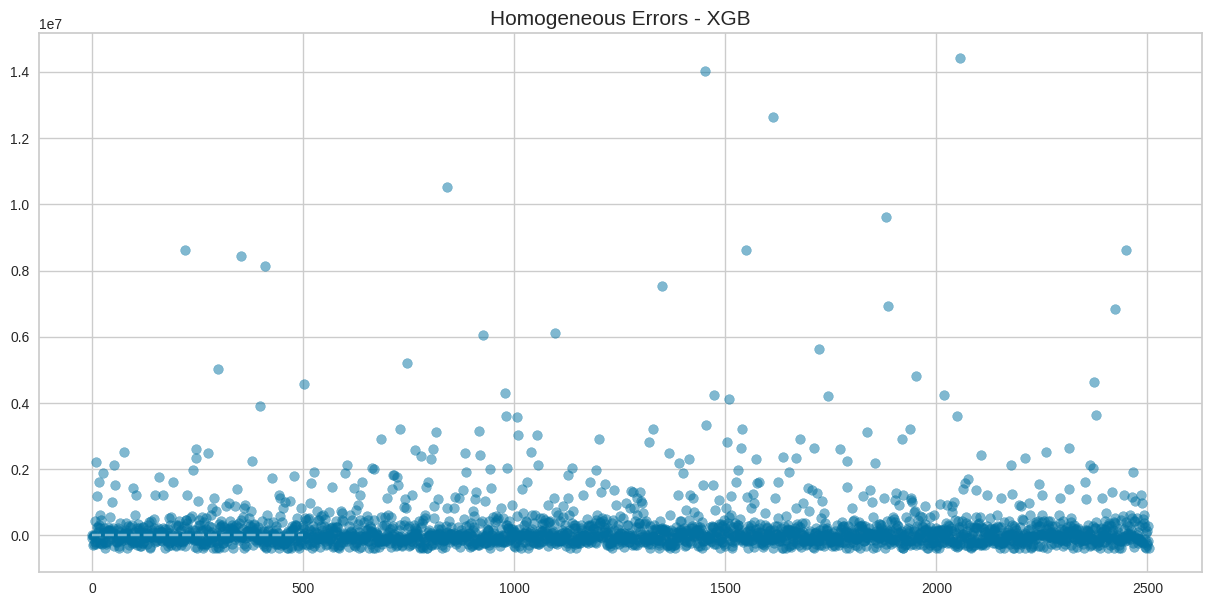

In [71]:
plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
xgb2_err= performance['Error']

plt.scatter(range(len(xgb2_err)), xgb2_err, alpha=.5)
plt.title('Homogeneous Errors - XGB', size=15);
plt.hlines(y=0, xmin=0, xmax=500, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

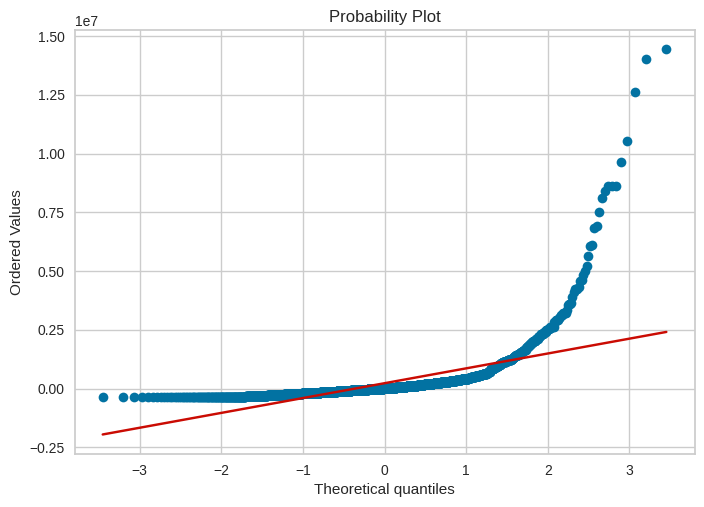

In [72]:
from scipy.stats import probplot
#QQ Plot
probplot(xgb2_err, dist='norm', plot=plt);

Support Vector Regressor:

In [65]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics
svr2 = SVR(kernel='rbf')
svr2.fit(X_train,y_train)

SVR()

In [66]:
svr_pred2 = svr2.predict(X_test)

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred2))  
print('MSE:', metrics.mean_squared_error(y_test, svr_pred2))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred2)))
print("Score (R^2):",svr2.score(X_test,y_test))
RSME.append(np.sqrt(metrics.mean_squared_error(y_test, svr_pred2)))
R_sqr.append(svr2.score(X_test,y_test))

MAE: 386741.83416499844
MSE: 963035916783.9187
RMSE: 981343.9339925216
Score (R^2): -0.058344221377169214


In [68]:
# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': svr_pred2,
                            'Error': y_test - svr_pred2})


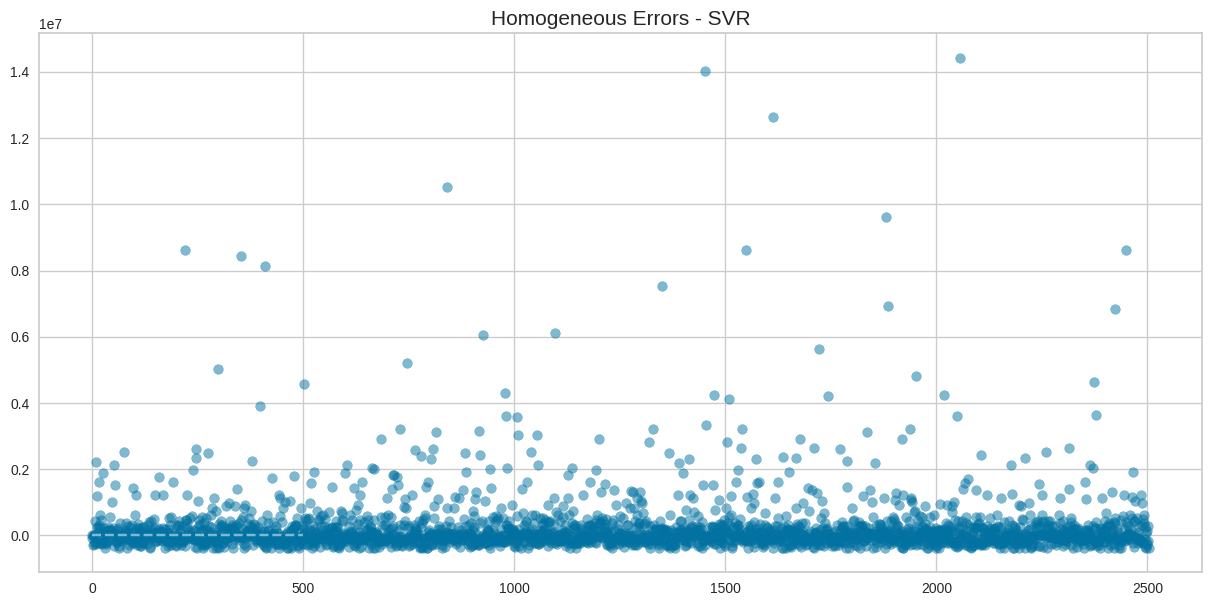

In [74]:
plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
svr2_err= performance['Error']

plt.scatter(range(len(svr2_err)), svr2_err, alpha=.5)
plt.title('Homogeneous Errors - SVR', size=15);
plt.hlines(y=0, xmin=0, xmax=500, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

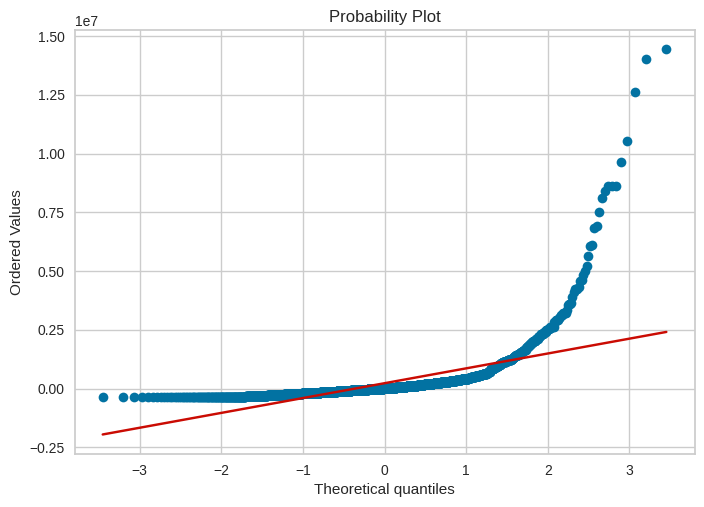

In [75]:
from scipy.stats import probplot
#QQ Plot
probplot(svr2_err, dist='norm', plot=plt);

KNN Regressor

In [76]:
# Fitting KNN model to the dataset
from sklearn.neighbors import KNeighborsRegressor
knr2 = KNeighborsRegressor(metric='minkowski', n_neighbors=5, n_jobs=-1)
knr2.fit(X_train, y_train)

# Predicting the yield
knr_pred2 = knr2.predict(X_test)

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, knr_pred2))  
print('MSE:', metrics.mean_squared_error(y_test, knr_pred2))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knr_pred2)))
print("Score (R^2):",knr2.score(X_test,y_test))
RSME.append(np.sqrt(metrics.mean_squared_error(y_test, knr_pred2)))
R_sqr.append(knr2.score(X_test,y_test))

MAE: 491114.50830670935
MSE: 1060610421499.9866
RMSE: 1029859.418318824
Score (R^2): -0.1655753343816082


In [79]:
# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': knr_pred2,
                            'Error': y_test - knr_pred2})


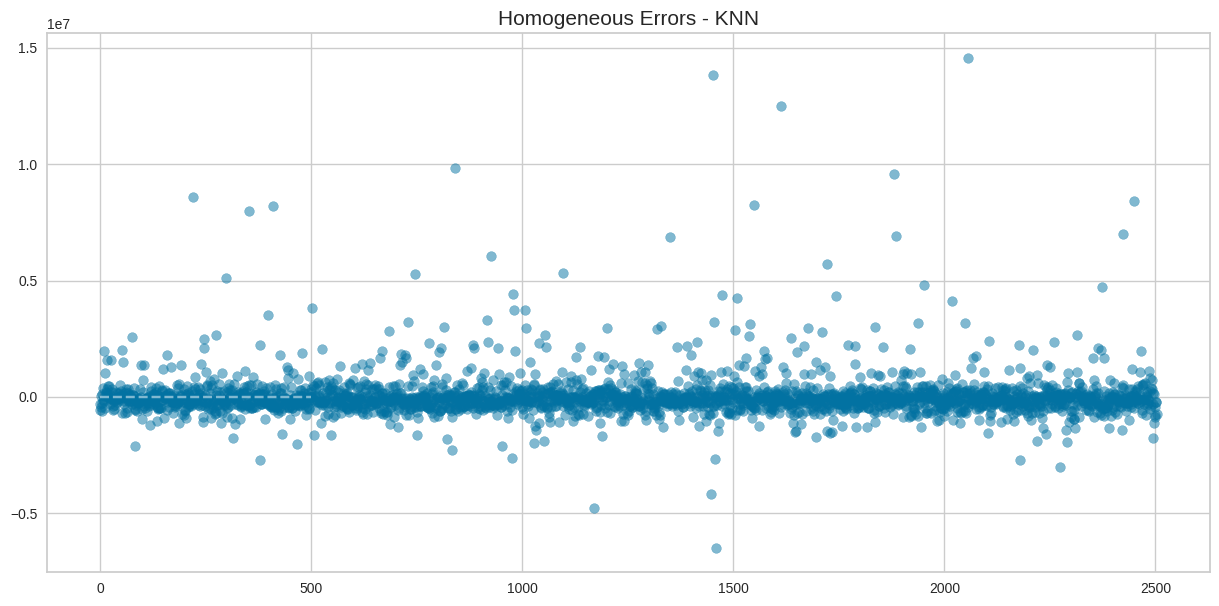

In [80]:
plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
knr2_err= performance['Error']

plt.scatter(range(len(knr2_err)), knr2_err, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=15);
plt.hlines(y=0, xmin=0, xmax=500, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

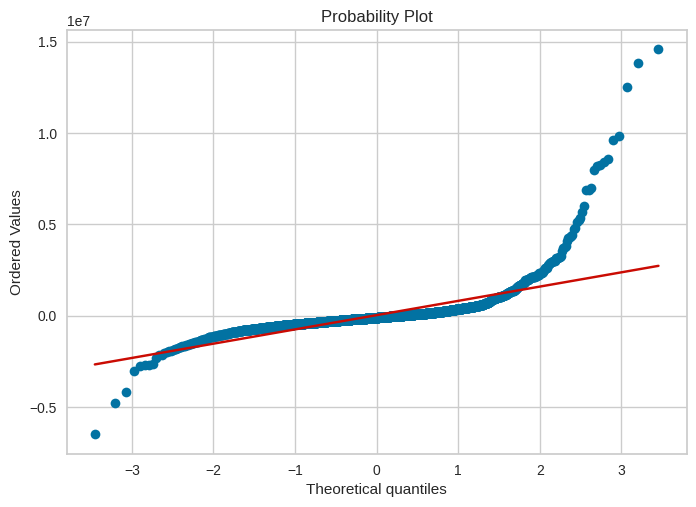

In [81]:
from scipy.stats import probplot
#QQ Plot
probplot(knr2_err, dist='norm', plot=plt);

In [ ]:
data = {'RSME': [9.2798, 9.4001 ,8.7455 , 10.8134, 10.2823,9.2806],
        'R_Sqr': [0.2465,0.0289, 2.1594, -0.05834, -0.1618,0.24645]}


Model=['Linear Regression','Random Forest','XG Boost','SVR','KNN', 'Lasso regression']
# Creates pandas DataFrame.
df2 = pd.DataFrame(data, index= Model)
df2

,RSME,R_Sqr
Linear Regression,9.2798,0.24650
Random Forest,9.4001,0.02890
XG Boost,8.7455,2.15940
SVR,10.8134,-0.05834
KNN,10.2823,-0.16180
Lasso regression,9.2806,0.24645


<Axes: >

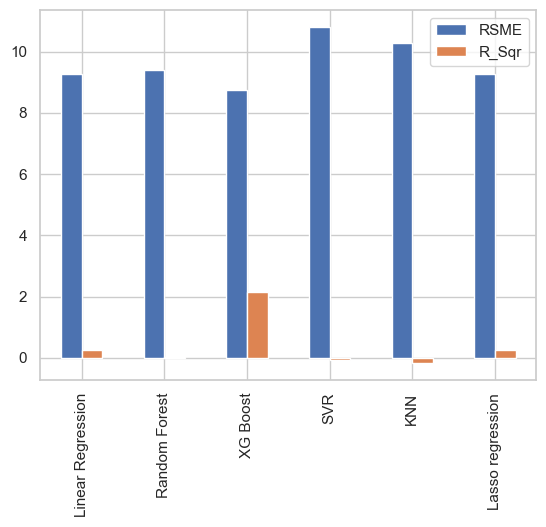

In [ ]:
df2.plot(kind='bar')

In [82]:
data_g = data_f.groupby('AreaName').mean()
data_g['Count'] = data_f.groupby('AreaName').count()['lat']
mean_lat = data_g['lat'].mean()
mean_lng = data_g['lng'].mean()

data_g.sort_values('Price', ascending=False, inplace=True)

In [83]:
import folium
from folium.plugins import MarkerCluster
on_map_c = folium.Map(location=[mean_lat, mean_lng], zoom_start=10)

# create a mark cluster object
marker_cluster = MarkerCluster().add_to(on_map_c)

# add data point to the mark cluster
for i in range(len(data_g)):
    area_name = data_g.iloc[i].name
    price = round(data_g.iloc[i]['Price'])
    lat = data_g.iloc[i]['lat']
    lng = data_g.iloc[i]['lng']
    cnt = round(data_g.iloc[i]['Count'])
    marker_text = f'{area_name}\nPrice:{price}\nSize: {cnt}'
    folium.Marker(
        location=[lat, lng],
        popup=marker_text,
        icon=None
    ).add_to(marker_cluster)
on_map_c.add_child(marker_cluster)

In [ ]:
# HeatMap of House Prices
from folium.plugins import HeatMap
on_map_c = folium.Map(location=[mean_lat, mean_lng], zoom_start=10)
HeatMap(data_g[['lat','lng','Price']]).add_to(on_map_c)
on_map_c

## Merge both dataset:

In [86]:
data = pd.read_csv('/content/drive/My Drive/properties.csv')
data2 = pd.read_excel('/content/drive/My Drive/clean_combined_toronto_property_data.xlsx')
data.rename(columns={'AreaName': 'region'}, inplace=True)
#data2.rename(columns={'region': 'City'}, inplace=True)
data2 = data2.drop('pricem', axis=1)

In [88]:
# adding column with constant value
data2['City'] = pd.Series(['GTA' for x in range(len(data2.index))])

In [89]:
data['City'] = pd.Series(['ON' for x in range(len(data.index))])

In [90]:
data3 = pd.concat([data, data2], ignore_index = True)
data3.head(2)

,Address,region,Price,bedrooms,bathrooms,sqft_living,sqft_lot,lat,lng,City
0,"86 Waterford Dr Toronto, ON",Richview,999888.0,3.0,1.00,1180,5650,43.679882,-79.544266,ON
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900.0,3.0,2.25,2570,7242,43.250000,-79.904396,ON


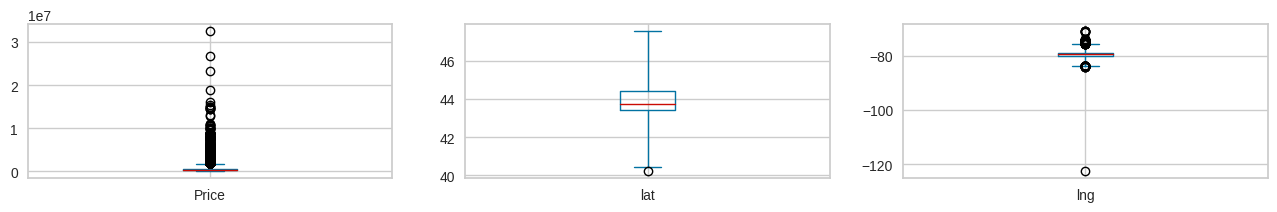

Index(['Address', 'region', 'Price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'lat', 'lng', 'City'],
      dtype='object') (25030, 10)


In [91]:
def remove_outliers(data3, *cols):
    for col in cols:
        q1 = data3[col].quantile(q = 0.25)
        q3 = data3[col].quantile(q = 0.75) 
        iqr = q3 - q1
        t1 = q1 - 3 * iqr
        t2 = q3 + 3 * iqr
        data = data3[(data3[col] > t1) & (data3[col] < t2)]
    return data

df_c = remove_outliers(data3, 'Price','lng', 'lat')
df_c.shape
fig,axes = plt.subplots(1,3,figsize=(16,2))
df_c['Price'].plot.box(whis=3, grid=True, ax = axes[0])
df_c['lat'].plot.box(whis=3, grid=True, ax = axes[1])
df_c['lng'].plot.box(whis=3, grid=True, ax = axes[2])
plt.show()
print(df_c.columns,df_c.shape)

In [92]:
# Seperate data with/without null:
df_withna = df_c.loc[df_c['region'].isna()]
df_wona = df_c.loc[df_c['region'].notna()]
print(df_withna.shape, df_wona.shape)

(315, 10) (24715, 10)


In [93]:
# Split train/test dataset:
from sklearn.model_selection import train_test_split
training, testing = train_test_split(df_wona,test_size=0.25, random_state=1)

x_train = training.copy()[['lat','lng']]
y_train = training.copy()['region']

x_test = testing.copy()[['lat','lng']]
y_test = testing.copy()['region']

print(training.shape)
print(testing.shape)

(18536, 10)
(6179, 10)


In [94]:
# Build Random Forest Classifier workflow:
from sklearn.preprocessing import PowerTransformer, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 
rf_model = RandomForestClassifier(criterion='gini',
                                  n_jobs=16,
                                  max_features = 'auto',
                                  n_estimators = 100,
                                  max_depth = None,
                                  random_state=133)
pipe_clf = Pipeline([
        ('sc',StandardScaler()),
        ('power_trans',PowerTransformer()),
        ('polynom_trans',PolynomialFeatures(degree=2)),
        ('rf_clf', rf_model)
        ])
print(pipe_clf)

Pipeline(steps=[('sc', StandardScaler()), ('power_trans', PowerTransformer()),
                ('polynom_trans', PolynomialFeatures()),
                ('rf_clf',
                 RandomForestClassifier(max_features='auto', n_jobs=16,
                                        random_state=133))])


In [95]:
# Fit model & Check the accuracy score of the random forest model:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
pipe_clf.fit(x_train,y_train)
y_predict = pipe_clf.predict(x_test)
print(f'accuracy score is: {accuracy_score(y_test,y_predict)}')

accuracy score is: 0.9156821492150834


In [96]:
import warnings
warnings.filterwarnings('ignore') 
df_withna['region'] = pipe_clf.predict(df_withna[['lat','lng']])
df_withna.head()

,Address,region,Price,bedrooms,bathrooms,sqft_living,sqft_lot,lat,lng,City
209,"7393 Wellington Rd 51 . Ariss, ON",Guelph,699000.0,6.0,3.00,2300,3404,43.596718,-80.340660,ON
1186,"152 MARR Drive Elora, ON",Elora,399900.0,3.0,1.00,1170,11100,43.693314,-80.437492,ON
1272,"4 MOSS DRIVE Long Sault, ON",Saint Andrews West,385000.0,4.0,3.25,4250,8570,45.038666,-74.861732,ON
1273,"13 STRATFORD BOULEVARD Long Sault, ON",Saint Andrews West,399000.0,3.0,2.50,2400,99752,45.031109,-74.875374,ON
1276,"44 FOREST HILL ROAD Long Sault, ON",Saint Andrews West,790000.0,4.0,2.25,2350,18600,45.032341,-74.874435,ON


In [97]:
# Combine two forms & export
df_final = pd.concat([df_wona, df_withna])
df_final.head()
# data_f.to_csv('properties_output.csv')

,Address,region,Price,bedrooms,bathrooms,sqft_living,sqft_lot,lat,lng,City
0,"86 Waterford Dr Toronto, ON",Richview,999888.0,3.0,1.00,1180,5650,43.679882,-79.544266,ON
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900.0,3.0,2.25,2570,7242,43.250000,-79.904396,ON
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000.0,2.0,1.00,770,10000,43.251690,-79.919357,ON
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900.0,4.0,3.00,1960,5000,43.227161,-79.767403,ON
4,"#1409 - 230 King St Toronto, ON",Downtown,362000.0,3.0,2.00,1680,8080,43.651478,-79.368118,ON


<Axes: title={'center': 'Pearson Correlation of features'}>

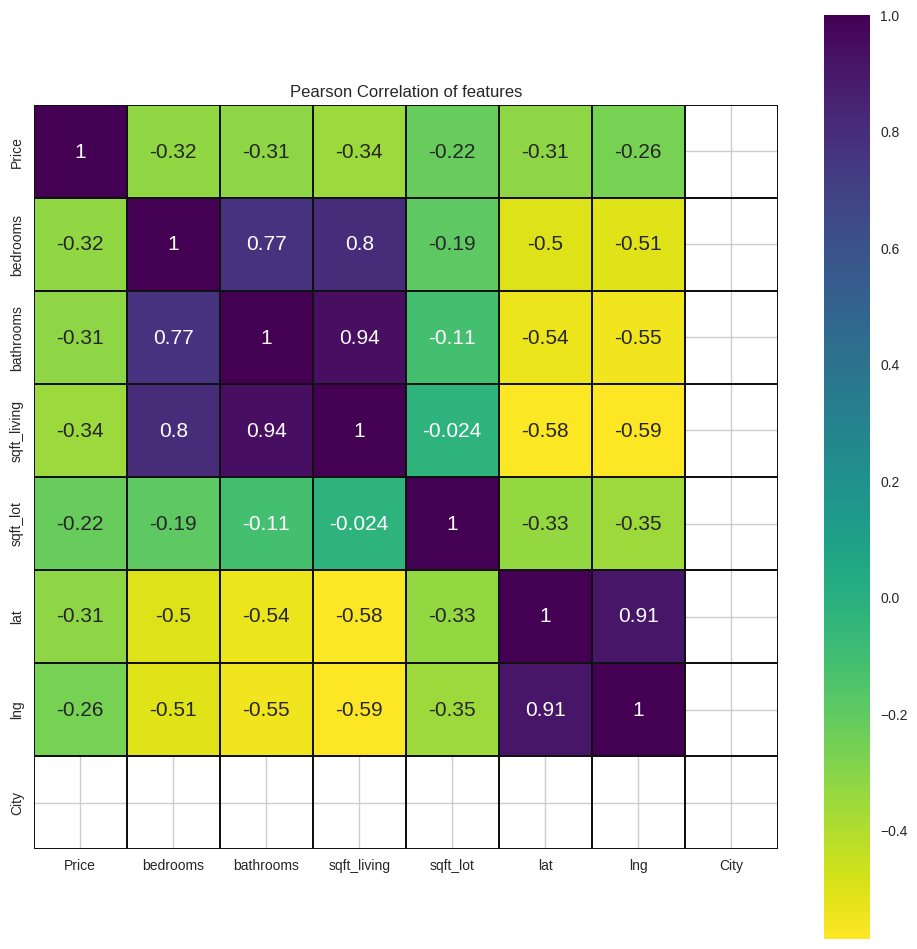

In [122]:
corr = df_final.corr()
f, ax = plt.subplots(figsize=(12, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn

sns.heatmap(corr.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="viridis_r", linecolor='k', annot=True)

<Axes: title={'center': 'Pearson Correlation of features'}>

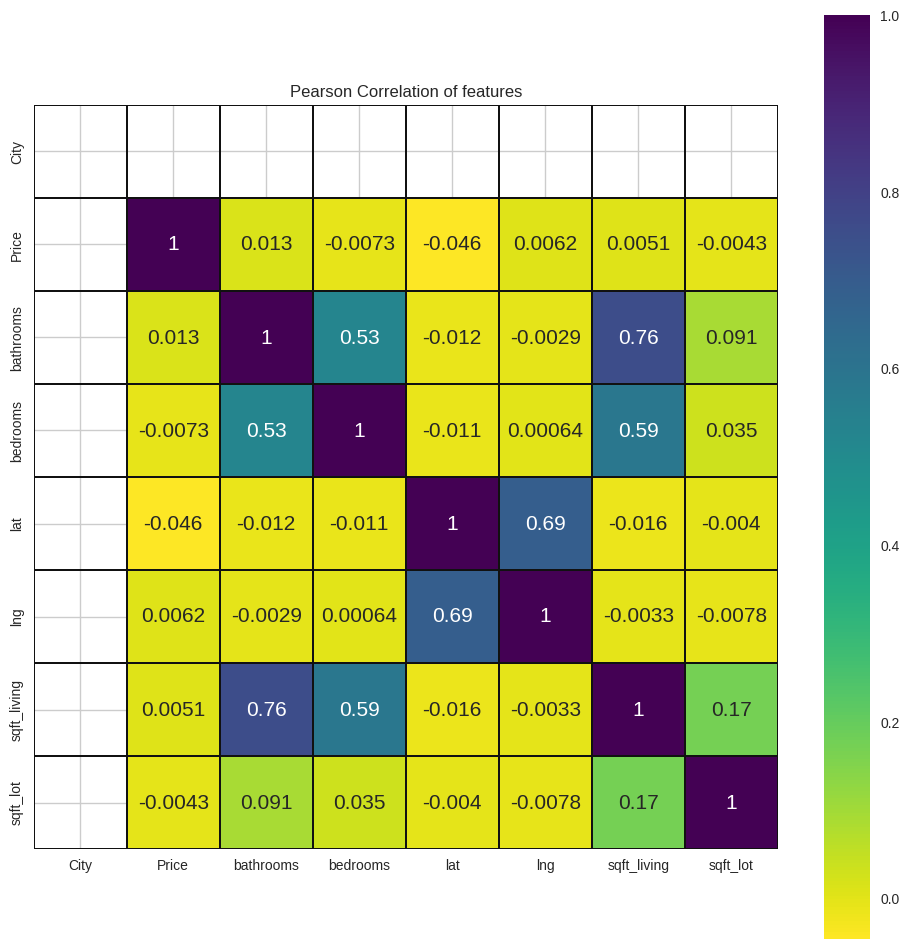

In [120]:
plt.rcParams.update({'font.size': 15})
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df_final.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df_final.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = df_final[num_list]
f, ax = plt.subplots(figsize=(12, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn

sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="viridis_r", linecolor='k', annot=True)

In [101]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_final['City']= label_encoder.fit_transform(df_final['City'])
  
df_final['City'].unique()

array([0])

In [102]:
y = df_final['Price']
X = pd.get_dummies(df_final.drop(columns= ["Price","lat","lng","Address"]), prefix= 'region')
print(X.shape)
X.head(2)

(25030, 1091)


,bedrooms,bathrooms,sqft_living,sqft_lot,City,region_Aberfoyle,region_Acton,region_Agassiz,region_Agincourt,region_Agincourt North,...,region_Yarker,region_Yeoville,region_Yonge and Lawrence,region_York,region_York District,region_York Mills,region_York University Heights,region_Yorkdale,region_Zephyr,region_Zurich
0,3.0,1.00,1180,5650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.25,2570,7242,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22527, 1091), (22527,), (2503, 1091), (2503,))

In [104]:
rf3 = RandomForestRegressor(n_estimators=100,criterion='squared_error',n_jobs=2)
rf3.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
rf_pred3 = rf3.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
RSME, R_sqr = [],[] 
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred3))  
print('MSE:', metrics.mean_squared_error(y_test, rf_pred3))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred3)))
print("Score (R^2):",rf3.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, rf_pred3)))
R_sqr.append(rf3.score(X_test,y_test))

MAE: 384069.51811565773
MSE: 771521279340.6263
RMSE: 878362.8403687319
Score (R^2): -0.03047533155668214


In [ ]:
svr3 = SVR(kernel='rbf')
svr3.fit(X_train,y_train)

SVR()

In [ ]:
svr_pred3 = svr3.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred3))  
print('MSE:', metrics.mean_squared_error(y_test, svr_pred3))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred3)))
print("Score (R^2):",svr3.score(X_test,y_test))
RSME.append(np.sqrt(metrics.mean_squared_error(y_test, svr_pred3)))
R_sqr.append(svr3.score(X_test,y_test))

MAE: 358594.14777147194
MSE: 784969772856.5695
RMSE: 885985.1990053612
Score (R^2): -0.04843768876687249


In [105]:
xgb3 = XGBRegressor(n_estimators=100, learning_rate=0.08)
xgb3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [107]:
xgb_pred3 = xgb3.predict(X_test)
xgb3.score(X_test,y_test)

0.06601709740973793

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, xgb_pred3))  
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred3))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred3)))
print("Score (R^2):",xgb3.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred3)))
R_sqr.append(xgb3.score(X_test,y_test))

MAE: 376999.741672493
MSE: 699276985893.6444
RMSE: 836227.831331656
Score (R^2): 0.06601709740973793


In [110]:
# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': xgb_pred3,
                            'Error': y_test - xgb_pred3})

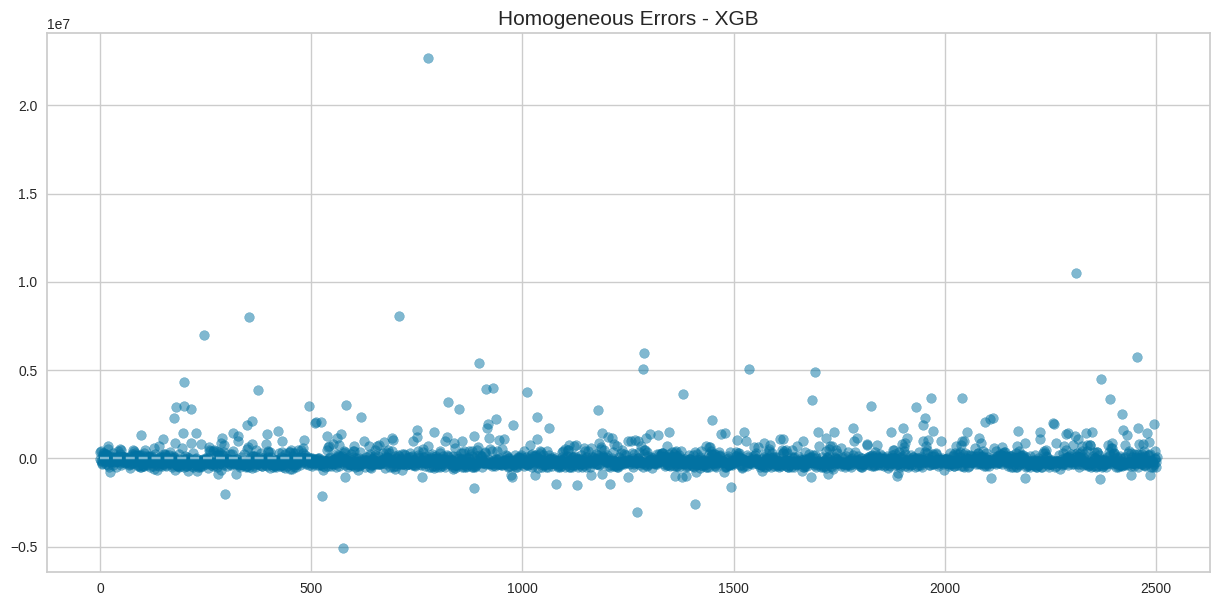

In [112]:
plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
xgb3_err= performance['Error']

plt.scatter(range(len(xgb3_err)), xgb3_err, alpha=.5)
plt.title('Homogeneous Errors - XGB', size=15);
plt.hlines(y=0, xmin=0, xmax=500, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

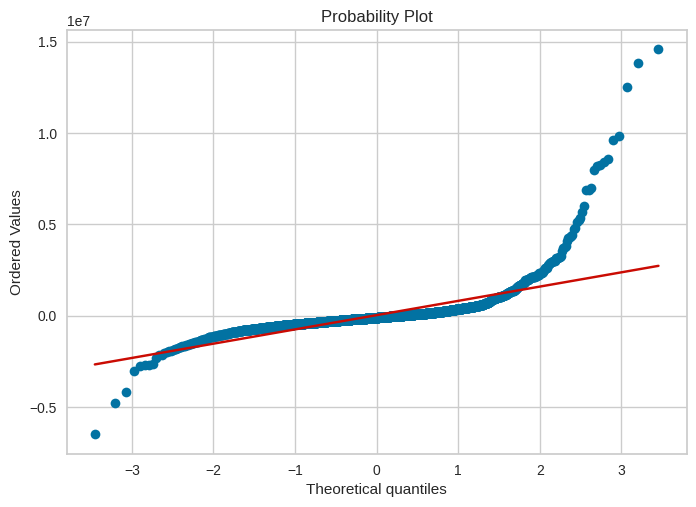

In [113]:
from scipy.stats import probplot
#QQ Plot
probplot(knr2_err, dist='norm', plot=plt);

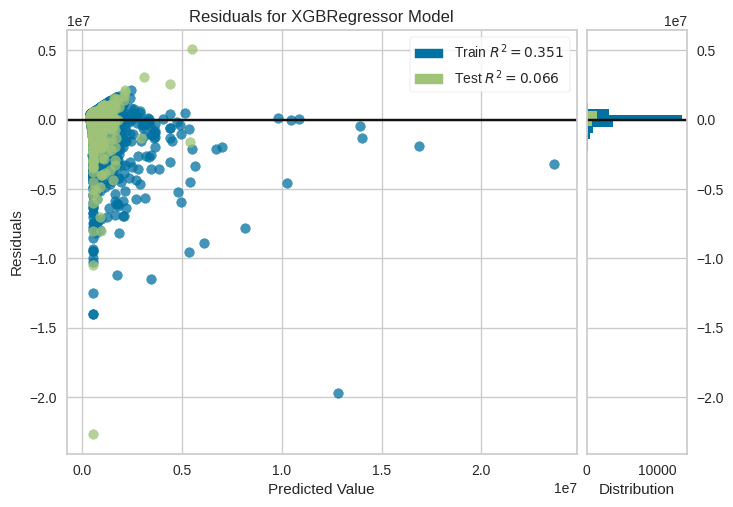

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [114]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(xgb3)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
# Fitting KNN model to the dataset
from sklearn.neighbors import KNeighborsRegressor
knr3 = KNeighborsRegressor(metric='minkowski', n_neighbors=5, n_jobs=-1)
knr3.fit(X_train, y_train)

# Predicting the yield
knr_pred3 = knr3.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, knr_pred3))  
print('MSE:', metrics.mean_squared_error(y_test, knr_pred3))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knr_pred3)))
print("Score (R^2):",knr3.score(X_test,y_test))
RSME.append(np.sqrt(metrics.mean_squared_error(y_test, knr_pred3)))
R_sqr.append(knr3.score(X_test,y_test))

MAE: 458447.39145025966
MSE: 885615878611.8556
RMSE: 941071.6649713005
Score (R^2): -0.18286473825370586


In [ ]:
# Fitting training set to lasso regression model
from sklearn.linear_model import Lasso
ls3 = Lasso(alpha=1.0)
ls3.fit(X_train, y_train)

# Predicting the yield
ls_pred3 = ls3.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, ls_pred3))  
print('MSE:', metrics.mean_squared_error(y_test, ls_pred3))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ls_pred3)))
print("Score (R^2):",ls3.score(X_test,y_test))
RSME.append(np.sqrt(metrics.mean_squared_error(y_test, ls_pred3)))
R_sqr.append(ls3.score(X_test,y_test))

MAE: 344966.0420995965
MSE: 657835701629.6245
RMSE: 811070.7130883377
Score (R^2): 0.12136776923903259


In [ ]:
data = {'RSME': [8.2798, 9.7385 ,8.3622 , 9.85985, 9.4107,8.1107],
        'R_Sqr': [0.2465,-0.0199, 1.0660,-0.0484, -0.1828,0.1213]}


Model=['Linear Regression','Random Forest','XG Boost','SVR','KNN', 'Lasso regression']
# Creates pandas DataFrame.
df3 = pd.DataFrame(data, index= Model)
df3

,RSME,R_Sqr
Linear Regression,8.27980,0.2465
Random Forest,9.73850,-0.0199
XG Boost,8.36220,1.0660
SVR,9.85985,-0.0484
KNN,9.41070,-0.1828
Lasso regression,8.11070,0.1213


<Axes: >

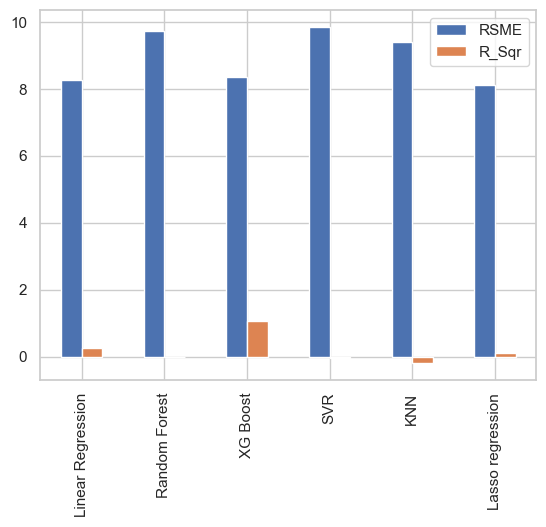

In [ ]:
df3.plot(kind='bar')

In [ ]:
labels=['RF','SVR','XGB']
plot = pd.DataFrame({'labels':labels,"RSME":RSME,"R-sqr":R_sqr})
plot.head()

,labels,RSME,R-sqr
0,RF,873857.278379,-0.019931
1,SVR,885985.199005,-0.048438
2,XGB,836227.831332,0.066017


In [ ]:
df.columns

Index(['RSME', 'R_Sqr'], dtype='object')

In [ ]:
y1 = df.Price
X1 = pd.get_dummies(df.drop(columns= ["Price", "pricem","address","label"]), prefix= 'region')
print(X1.shape)

AttributeError: 'DataFrame' object has no attribute 'Price'

In [ ]:
y2 = df2.Price
X2 = pd.get_dummies(df2.drop(columns= ["Price","lat","lng","Address"]), prefix= 'AreaName')
print(X2.shape)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.20, random_state=2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.20, random_state=2)

In [ ]:
X1_test.shape, X1_train.shape, y1_test.shape

In [ ]:
xgb_pred4 = xgb3.predict(X1_test)
xgb3.score(X1_test,y1_test)

In [ ]:
import time
t2 = time.time()
train_accuracy = []
n_trees = np.arange(1, 50, 1)
for tree in n_trees:
    rf = RandomForestClassifier(n_estimators= tree, random_state= 1)
    rf.fit(X_train, Y_train)
    train_accuracy_iter = accuracy_score(rf.predict(X_train), Y_train)
    train_accuracy.append(train_accuracy_iter)
time_rf = time.time()-t2
print('Finding n_tree for the random forest model took', time_rf, 'seconds.')

Finding n_tree for the random forest model took 522.2612969875336 seconds.


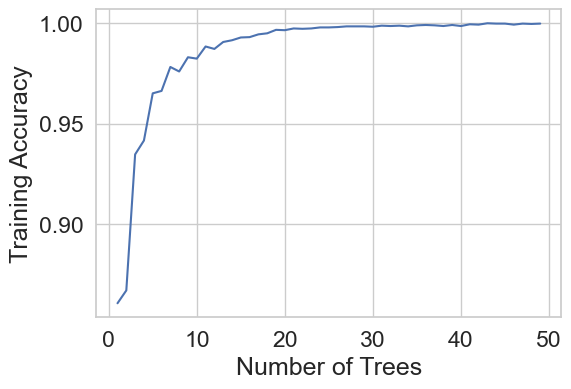

In [ ]:
sns.set(font_scale= 1.5)
sns.set_style('whitegrid')
plt.figure(figsize= (6, 4))
sns.lineplot(x = n_trees, y =train_accuracy)
plt.xlabel('Number of Trees')
plt.ylabel('Training Accuracy');

In [ ]:
print(max(train_accuracy))
array = n_trees[train_accuracy == max(train_accuracy)]
array

0.9998276456394347


array([43])

In [ ]:
rf_optimized = RandomForestClassifier(
    n_estimators = array[0],
    random_state= 1
)
rf_optimized.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=43, random_state=1)

In [ ]:
yhat_optimized = rf_optimized.predict(X_test)
accuracy_score(yhat_optimized, Y_test)

0.7119228118538938

Text(0.5, 1.0, 'RandomForestClassifier')

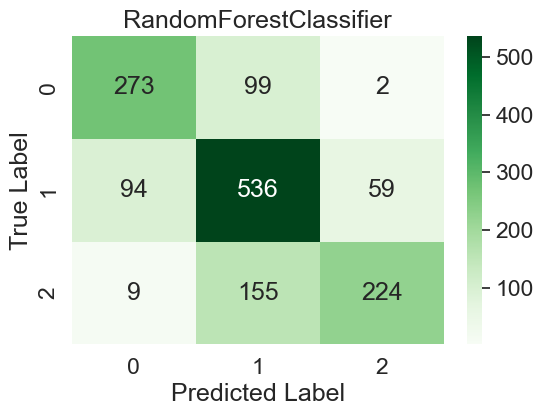

In [ ]:
sns.set(font_scale= 1.5)
plt.figure(figsize= (6,4))
sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_optimized), annot= True, cmap= 'Greens', fmt = 'g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RandomForestClassifier')

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens): 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center", color="white" 
                 if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
# fit model no training data
model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)
scores_xgb=cross_val_score(model_xgb, X_test,Y_test, cv=10)
y_pred = model_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
print("Confusion Matrix obtained for XG Boost is \n",confusion_matrix(Y_test,predictions))
print("Accuracy after applying XG Boost",(accuracy_score(Y_test,predictions)))
print("Scores after applying 10 CV on XG Boost",np.average(scores_xgb))
print("Precision for XG Boost ",precision_score(Y_test,predictions, average = 'micro'))
print("Recall for XG Boost ",recall_score(Y_test,predictions, average = 'micro'))

Confusion Matrix obtained for XG Boost is 
 [[266 105   3]
 [ 98 516  75]
 [  8 141 239]]
Accuracy after applying XG Boost 0.7036526533425224
Scores after applying 10 CV on XG Boost 0.6795323571091167
Precision for XG Boost  0.7036526533425224
Recall for XG Boost  0.7036526533425224


Confusion matrix, without normalization
[[266 105   3]
 [ 98 516  75]
 [  8 141 239]]


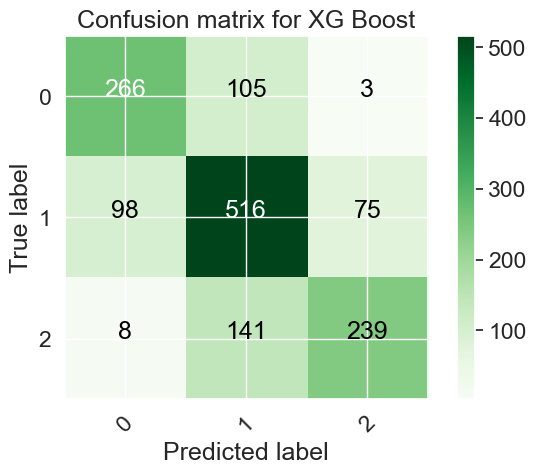

In [ ]:
conf_matrix_xgb = confusion_matrix(Y_test,predictions)
plt.figure()

plot_confusion_matrix(conf_matrix_xgb,

                      classes=[0,1,2],

                      title='Confusion matrix for XG Boost')

In [ ]:
import time
from sklearn import svm
from sklearn.svm import SVC
load_svm=svm.SVC(C=1.0, kernel='rbf', degree=3)
start_time=time.time()
load_svm.fit(X_train,Y_train)
value_pred_svm = load_svm.predict(X_test)
scores_svm=cross_val_score(load_svm, X_test,Y_test, cv=10)
print("Finished in ... ",time.time()-start_time)
print("Confusion Matrix obtained for Support Vector Machine Classifier is \n",confusion_matrix(Y_test,value_pred_svm))
print("Accuracy after applying Support Vector Machine is",(accuracy_score(Y_test,value_pred_svm)))
print("Scores after applying 10 CV on Support Vector Machine",np.average(scores_svm))
print("Precision for Support Vector Machine ",precision_score(Y_test,value_pred_svm, average = 'micro'))
print("Recall for Support Vector Machine ",recall_score(Y_test,value_pred_svm, average = 'micro'))

Finished in ...  802.8318409919739
Confusion Matrix obtained for Support Vector Machine Classifier is 
 [[  2 372   0]
 [  5 683   1]
 [  2 384   2]]
Accuracy after applying Support Vector Machine is 0.47346657477601656
Scores after applying 10 CV on Support Vector Machine 0.4727775153519131
Precision for Support Vector Machine  0.47346657477601656
Recall for Support Vector Machine  0.47346657477601656


Confusion matrix, without normalization
[[  2 372   0]
 [  5 683   1]
 [  2 384   2]]


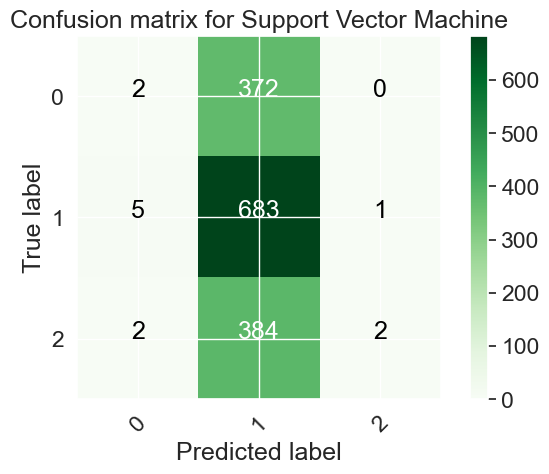

In [ ]:
conf_matrix_svm = confusion_matrix(Y_test,value_pred_svm)
plt.figure()

plot_confusion_matrix(conf_matrix_svm,

                      classes=[0,1,2],

                      title='Confusion matrix for Support Vector Machine')

In [ ]:
pd.DataFrame({
    "Model" : ["K-Nearest Neighbors", "Random Forest"],
    "Test split accuracy" : [accuracy_score(knn_optimized.predict(X_test), Y_test), accuracy_score(rf_optimized.predict(X_test), Y_test)]
})